# 9 · A Escala Logarítmica — A Lente para o Caos

**Registro observacional associado ao livro**  
*Descobrindo o Caos nos Números — Como a ordem emerge quando mudamos a forma de observar*  
© Alvaro Costa, 2025  

Este notebook faz parte de uma sequência canônica de registros computacionais.  
Ele não introduz hipóteses, conjecturas ou modelos interpretativos novos.

Seu objetivo é exclusivamente **registrar** o comportamento de estruturas aritméticas sob um regime  
de observação explícito, determinístico e reproduzível.

A leitura conceitual completa encontra-se no livro. Este notebook documenta apenas o experimento  
correspondente.

**Licença:** Creative Commons BY–NC–ND 4.0  
É permitida a leitura, execução e citação.  
Não é permitida a modificação, redistribuição adaptada ou uso comercial independente.

---

Um dos resultados mais fundamentais da nossa investigação é a descoberta de que a "música" do caos (GOE) só é audível através da lente  
logarítmica. Mas por que motivo? O que torna esta escala tão especial?

A resposta reside na forma como os números primos se distribuem na reta numérica. Para entender a eficácia da lente logarítmica, precisamos  
primeiro de visualizar a "topografia" do terreno dos primos, medindo a sua densidade em ambas as escalas: a linear e a logarítmica.

A célula de código abaixo irá gerar esta comparação visual, que é a chave para compreender a condição fundamental para a emergência do caos  
quântico no nosso sistema.

Gerando primos até 100,000,000...
-> 5,761,455 primos gerados em 0.25 segundos.


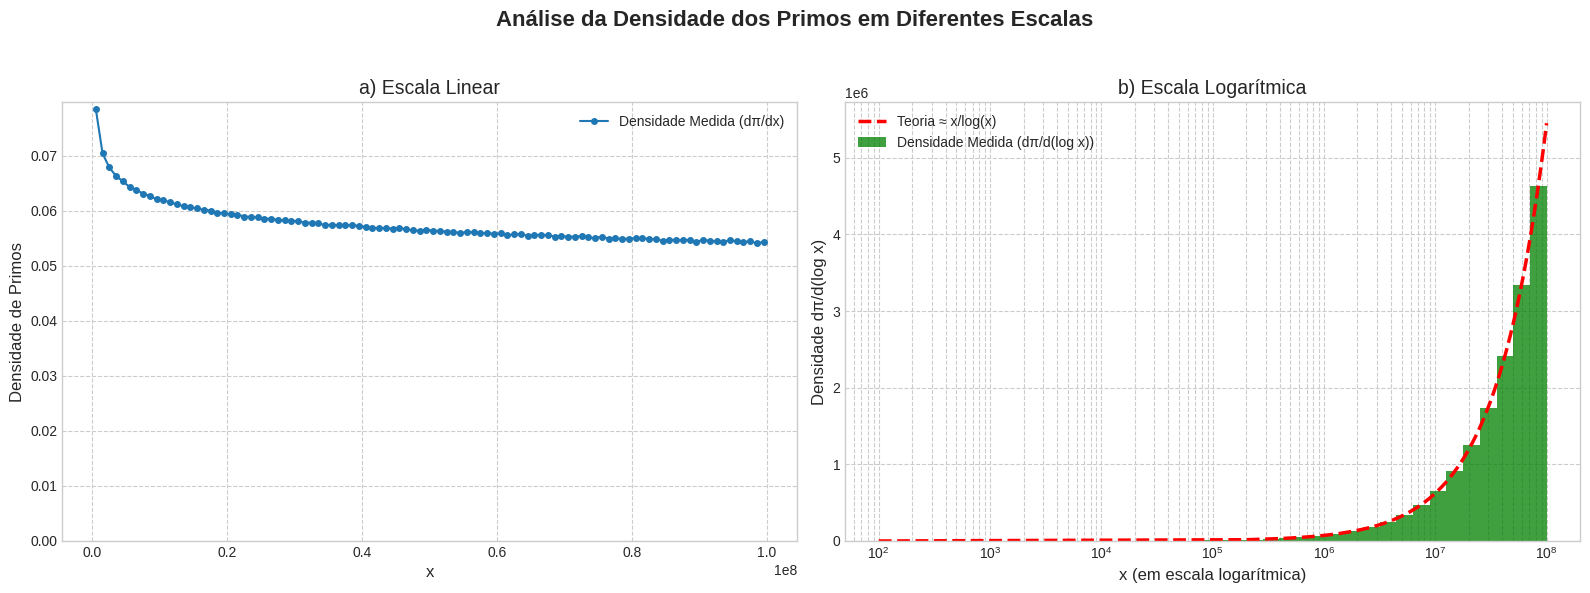

In [1]:
# Requisitos: numpy, matplotlib

import numpy as np
import matplotlib.pyplot as plt
from math import isqrt
import time

# --- 1. FUNÇÃO OTIMIZADA DE GERAÇÃO DE PRIMOS ---
def generate_primes_upto(n: int) -> np.ndarray:
    """Gera um array com todos os primos até n usando um crivo otimizado."""
    if n < 2: return np.array([], dtype=np.int64)
    size = (n - 1) // 2; sieve = np.ones(size, dtype=bool)
    limit = int(np.sqrt(n)) // 2
    for i in range(limit):
        if sieve[i]:
            p = 2 * i + 3; start = (p*p - 3) // 2
            sieve[start::p] = False
    indices = np.where(sieve)[0]; odd_primes = 2 * indices + 3
    return np.concatenate((np.array([2], dtype=np.int64), odd_primes))

# --- 2. PARÂMETROS E GERAÇÃO DE DADOS ---
X_MAX = 10**8
print(f"Gerando primos até {X_MAX:,}...")
start_time = time.time()
primes = generate_primes_upto(X_MAX) # Gera a lista de primos
end_time = time.time()
print(f"-> {len(primes):,} primos gerados em {end_time - start_time:.2f} segundos.")

# --- 3. CONFIGURAÇÃO DOS GRÁFICOS ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Análise da Densidade dos Primos em Diferentes Escalas", fontsize=16, weight='bold')

# --- 4. GRÁFICO DA ESQUERDA: ESCALA LINEAR ---
ax = axes[0]
num_bins_linear = 100
bin_width_linear = X_MAX / num_bins_linear
bin_edges_linear = np.arange(0, X_MAX + 1, bin_width_linear).astype(np.int64)

# Calcula a contagem em cada bin usando a lista de primos
prime_counts_linear, _ = np.histogram(primes, bins=bin_edges_linear)
densities_linear = prime_counts_linear / bin_width_linear
bin_centers_linear = bin_edges_linear[:-1] + bin_width_linear / 2

ax.plot(bin_centers_linear, densities_linear, 'o-', markersize=4, label='Densidade Medida (dπ/dx)')
ax.set_title("a) Escala Linear", fontsize=14)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("Densidade de Primos", fontsize=12)
ax.legend()
ax.grid(True, which="both", ls="--")
ax.set_ylim(bottom=0)

# --- 5. GRÁFICO DA DIREITA: ESCALA LOGARÍTMICA ---
ax = axes[1]
num_bins_log = 40
log_min = np.log(100)
log_max = np.log(X_MAX)
log_bin_edges = np.linspace(log_min, log_max, num_bins_log + 1)
bin_edges_log = np.exp(log_bin_edges).astype(np.int64)

# Calcula a contagem e a densidade logarítmica
prime_counts_log, _ = np.histogram(primes, bins=bin_edges_log)
log_bin_width = np.diff(log_bin_edges) # Largura de cada bin no espaço log
densities_log = prime_counts_log / log_bin_width
bin_centers_log = np.sqrt(bin_edges_log[:-1] * bin_edges_log[1:])

ax.bar(bin_edges_log[:-1], densities_log, width=np.diff(bin_edges_log), align='edge', alpha=0.75, label='Densidade Medida (dπ/d(log x))', color='green')

# Adiciona a curva teórica para comprovação
x_theory = np.linspace(bin_edges_log[0], bin_edges_log[-1], 500)
y_theory = x_theory / np.log(x_theory)
scaling_factor = np.mean(densities_log) / np.mean(bin_centers_log / np.log(bin_centers_log))
ax.plot(x_theory, y_theory * scaling_factor, color='red', lw=2.5, ls='--', label='Teoria ≈ x/log(x)')

ax.set_xscale('log')
ax.set_title("b) Escala Logarítmica", fontsize=14)
ax.set_xlabel("x (em escala logarítmica)", fontsize=12)
ax.set_ylabel("Densidade dπ/d(log x)", fontsize=12)
ax.legend()
ax.grid(True, which="both", ls="--")
ax.set_ylim(bottom=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


---

## Análise dos Gráficos: Da Densidade à Descoberta

Os dois gráficos acima revelam por que a escolha da escala não é uma preferência, mas uma necessidade fundamental para a nossa investigação.  
Eles demonstram visualmente a condição necessária para a emergência da "música" do caos (GOE).

### 1. A Lente Linear: Um Palco em Colapso

O gráfico da esquerda mostra um padrão claro e inevitável. A densidade de primos (o número de primos por unidade de comprimento, $d\pi/dx$)  
decai visivelmente à medida que $x$ aumenta. Como previsto pelo Teorema dos Números Primos, a densidade local é aproximadamente $1/\log(x)$,  
uma função que tende a zero.

Neste ambiente, as correlações complexas da GOE são abafadas. Tentar analisar estatísticas sutis em um "terreno" cuja principal característica  
é um colapso contínuo é como tentar ouvir uma orquestra enquanto o palco está a desmoronar-se. As "regras do jogo" não são estáveis, e apenas  
o "ruído" simples e descorrelacionado de Poisson consegue ser ouvido.

### 2. A Lente Logarítmica: A Emergência de uma Nova Ordem

O gráfico da direita, à primeira vista, pode ser surpreendente. Ele não mostra uma linha constante, mas sim uma tendência **crescente**. Longe  
de ser um erro, este é precisamente o comportamento teoricamente esperado e a chave para todo o nosso trabalho.

-   **A Razão (A Matemática da Transformação):** Esta tendência crescente é uma consequência matemática direta da própria mudança de escala.  
Mudar de uma régua linear para uma logarítmica "estica" os intervalos à medida que avançamos. A matemática nos ensina a compensar esse "esticamento":  
a densidade na escala logarítmica ($d\pi/d(\log x)$) está ligada à densidade linear ($d\pi/dx$) através de um fator de conversão que é o próprio `x`:  
    $$
    \frac{d\pi}{d(\log x)} = x \cdot \frac{d\pi}{dx}
    $$
    Como sabemos que $d\pi/dx \approx 1/\log(x)$, temos:
    $$
    \frac{d\pi}{d(\log x)} \approx x \cdot \frac{1}{\log(x)} = \frac{x}{\log(x)}
    $$
    A função $y = x/\log(x)$ é uma **função crescente**, e o gráfico confirma que os dados seguem perfeitamente esta lei.

-   **A Consequência (O Palco Estável):** A "naturalidade" desta escala não reside no fato de a densidade ser perfeitamente constante, mas sim no  
fato de ela transformar um **colapso** em uma **lei de crescimento suave e bem definida**. É esta ordem previsível que cria o "campo de jogos nivelado"  
— um pano de fundo estável contra o qual as *flutuações* estatísticas (a verdadeira fonte da GOE) podem ser claramente observadas.

### A Condição para o Caos

Isto explica por que a transição de Poisson para GOE, que observamos em capítulos anteriores, ocorre a partir de $10^5$-$10^6$. É nesta região que  
a distribuição dos primos atinge a "massa crítica" e passa a seguir de forma robusta esta lei de crescimento suave. Abaixo dessa escala, o "terreno"  
ainda é muito granulado e irregular.

Com o "palco" finalmente montado a partir de $10^5$, a orquestra dos primos, devidamente afinada, pode tocar a música do caos quântico.